In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
df['species'] = iris.target

In [34]:
from sklearn.preprocessing import LabelBinarizer

df = df[df.species.isin([1,2])]
df.species = LabelBinarizer().fit_transform(df.species)

In [35]:
df.shape

(100, 5)

In [36]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


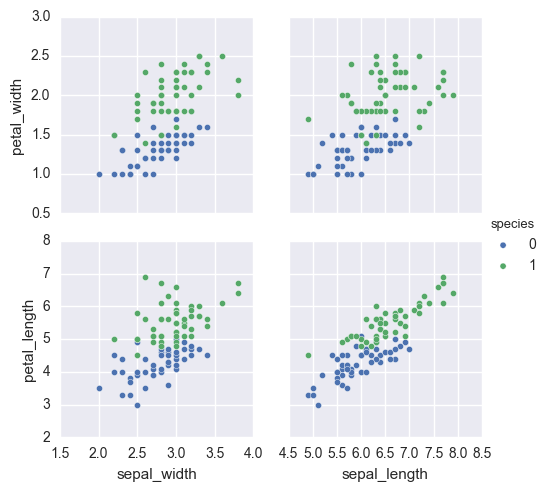

In [37]:
sns.pairplot(data=df, 
            x_vars=["sepal_width", "sepal_length"],
            y_vars=["petal_width", "petal_length"],
            hue='species')

# Logistic Regression

In [110]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].copy()
y = df.iloc[:, -1].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [111]:
from sklearn.preprocessing import StandardScaler

# standarize using train data
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [112]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)
y_pred_proba_lr = clf_lr.predict_proba(X_test)

In [113]:
print('train accuracy: %.5f' %(clf_lr.score(X_train, y_train)))
print('test accuracy: %.5f' %(clf_lr.score(X_test, y_test)))

train accuracy: 0.98571
test accuracy: 0.93333


In [114]:
from sklearn.metrics import accuracy_score, roc_auc_score

print("auc : %.5f" %roc_auc_score(y_test, y_pred_proba_lr[:,1]))

auc : 0.99556


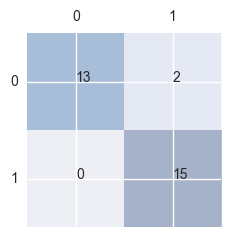

             precision    recall  f1-score   support

          0       1.00      0.87      0.93        15
          1       0.88      1.00      0.94        15

avg / total       0.94      0.93      0.93        30



In [115]:
from sklearn.metrics import confusion_matrix, classification_report

mat = confusion_matrix(y_test, y_pred_lr)
fig, ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(mat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(2):
    for j in range(2):
        ax.text(x=j,y=i,s=mat[i,j])
plt.show()
print(classification_report(y_test, y_pred_lr))

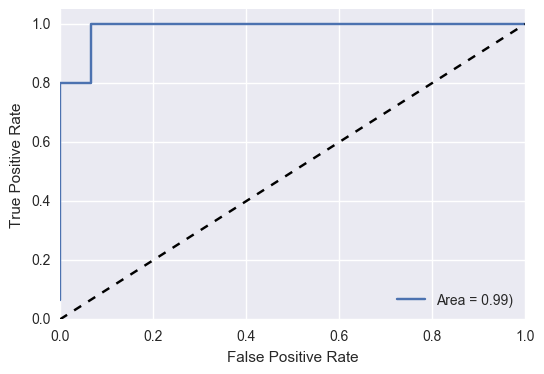

In [124]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thres = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr,
         label='Area = %.2f)' %roc_auc)


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Decision Tree

In [116]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].copy()
y = df.iloc[:, -1].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [117]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(max_depth=2)

clf_dt.fit(X_train,y_train)
y_pred_dt = clf_dt.predict(X_test)
y_pred_proba_dt = clf_dt.predict_proba(X_test)

In [118]:
print('train accuracy: %.5f' %(clf_dt.score(X_train, y_train)))
print('test accuracy: %.5f' %(clf_dt.score(X_test, y_test)))

train accuracy: 0.97143
test accuracy: 0.83333


In [119]:
from sklearn.metrics import accuracy_score, roc_auc_score

print("auc : %.5f" %roc_auc_score(y_test, y_pred_proba_dt[:,1]))

auc : 0.90000


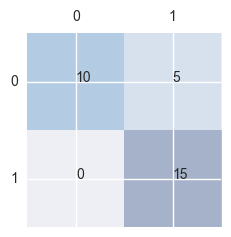

             precision    recall  f1-score   support

          0       1.00      0.67      0.80        15
          1       0.75      1.00      0.86        15

avg / total       0.88      0.83      0.83        30



In [120]:
from sklearn.metrics import confusion_matrix, classification_report

mat = confusion_matrix(y_test, y_pred_dt)
fig, ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(mat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(2):
    for j in range(2):
        ax.text(x=j,y=i,s=mat[i,j])
plt.show()
print(classification_report(y_test, y_pred_dt))

In [121]:
importances = clf_dt.feature_importances_
features = X.columns
arg_sort = np.argsort(importances)[::-1]
n = min(len(features), 10)
for i in range(n):
    idx = arg_sort[i]
    print('%2d. %-*s %.2f %%' %(i+1,15, features[idx],importances[idx]*100))

 1. petal_length    93.96 %
 2. sepal_length    6.04 %
 3. petal_width     0.00 %
 4. sepal_width     0.00 %


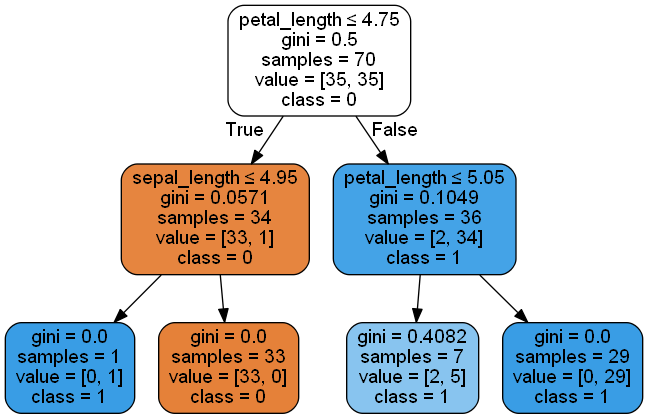

In [122]:
from sklearn import tree
import pydotplus 
from IPython.display import Image 

feature_names = X.columns
class_names = ['0','1']
dot_data = tree.export_graphviz(clf_dt, 
                            out_file=None, 
                            feature_names=feature_names,  
                            class_names=class_names,  
                            filled=True, rounded=True,  
                            special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

# keras : neural network

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].copy()
y = df.iloc[:, -1].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [67]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y_ohe = ohe.fit_transform(y.reshape(-1,1)).toarray()

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_ohe, test_size=0.3)

In [83]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
    
model = Sequential()
model.add(Dense(8, input_dim=4, init='uniform', activation='sigmoid'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [84]:
X_train.shape

(70, 4)

In [85]:
y_train.shape

(70, 2)

In [ ]:
model.fit(X_train, y_train, nb_epoch=10, batch_size=1, verbose=0)

In [ ]:
loss, accuracy = model.evaluate(test_X, test_y, verbose=0)

In [38]:
loss

0.56606936795370921

In [39]:
accuracy

0.63809523979822791